<a href="https://colab.research.google.com/github/Meenusiwach/sentimentanalysis_twitter/blob/main/twittersentimentanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyngrok

In [9]:
!pip install kaggle

In [10]:
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 74% 60.0M/80.9M [00:00<00:00, 212MB/s]
100% 80.9M/80.9M [00:00<00:00, 209MB/s]


In [11]:
# Unzip the dataset
!unzip sentiment140.zip

# Import necessary libraries
import pandas as pd

# Load the dataset
# The data is in a CSV file named "training.1600000.processed.noemoticon.csv"
data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', header=None)

# Define column names for clarity
data.columns = ['sentiment', 'id', 'date', 'query', 'user', 'text']

# Map sentiment labels to "positive", "negative", and "neutral"
data['sentiment'] = data['sentiment'].map({0: 'negative', 2: 'neutral', 4: 'positive'})

# Print the first few rows of the dataframe
print(data.head())

Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  
  sentiment          id                          date     query  \
0  negative  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1  negative  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2  negative  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3  negative  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4  negative  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import joblib

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], test_size=0.2, random_state=42)

# Create a pipeline with a vectorizer and a logistic regression classifier
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
print(f"Model accuracy: {pipeline.score(X_test, y_test):.2f}")

# Save the trained model
joblib.dump(pipeline, '/content/trained_model.joblib')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy: 0.80


['/content/trained_model.joblib']

In [2]:
from flask import Flask
from pyngrok import ngrok

In [3]:
port_no = 5000

In [4]:
app = Flask(__name__)
ngrok.set_auth_token("2g3eQaoQ7K47kV7uRwf8yiAutxn_7Q7etj3mMBFiHmxmudL3z")
public_url =  ngrok.connect(port_no).public_url

@app.route("/")
def home():
    return render_template('home.html')
    #return f"Running Flask on Google Colab!"

print(f"To acces the Gloable link please click {public_url}")

app.run(port=port_no)

To acces the Gloable link please click https://dbc5-34-168-203-146.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 2529, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-4-ba5a4407dd6b>", line 7, in home
    return render_template('home.html')
NameError: name 'render_template' is not defined
INFO:wer

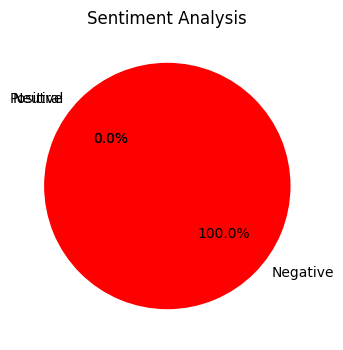

In [37]:
import joblib
from IPython.display import HTML
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib import colors

# Load the HTML file
html_file_path = "/content/home.html"  # Adjust the file path as necessary
with open(html_file_path, "r") as file:
    html_file_content = file.read()

# Display the HTML file
display(HTML(html_file_content))

# Load the trained model
model_path = '/content/trained_model.joblib'  # Adjust the path as necessary
model = joblib.load(model_path)

# Example dataset for testing
data = {
    "text": [
        "I hate the new movie!",
        "I love the new movie!"
        "The weather is terrible today.",
        "I feel neutral about this event."
    ]
}

# Perform sentiment analysis
def perform_sentiment_analysis(topic):
    # Filter data based on the topic
    filtered_texts = [text for text in data["text"] if topic in text]

    # Predict sentiment using the model
    predictions = model.predict(filtered_texts)

    # Count positive, negative, and neutral sentiments
    positive_count = sum(predictions == 'positive')
    negative_count = sum(predictions == 'negative')
    neutral_count = sum(predictions == 'neutral')

    # Return the sentiment analysis results
    return positive_count, negative_count, neutral_count

# Function to create a pie chart
def create_pie_chart(positive_count, negative_count, neutral_count):
    # Define data for the pie chart
    labels = ['Positive', 'Negative', 'Neutral']
    sizes = [positive_count, negative_count, neutral_count]
    colors_list = ['blue', 'red', 'gray']

    # Create a pie chart
    plt.figure(figsize=(4, 4))
    plt.pie(sizes, labels=labels, colors=colors_list, autopct='%1.1f%%', startangle=140)
    plt.title("Sentiment Analysis")
    plt.show()

# Test the sentiment analysis and pie chart creation
topic = "movie"  # Adjust the topic as necessary
positive_count, negative_count, neutral_count = perform_sentiment_analysis(topic)
create_pie_chart(positive_count, negative_count, neutral_count)


0


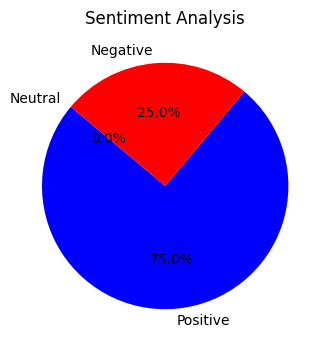

In [44]:
import joblib
from IPython.display import HTML, display
import matplotlib.pyplot as plt

# Load the HTML file
html_file_path = "/content/home.html"  # Adjust the file path as necessary
with open(html_file_path, "r") as file:
    html_file_content = file.read()

# Display the HTML file
display(HTML(html_file_content))

# Load the trained model
model_path = '/content/trained_model.joblib'  # Adjust the path as necessary
model = joblib.load(model_path)

# Example dataset for testing
data = {
    "text": [
        "I hate the new movie!",
        "I  saw new movie!",
         "I love the new movie!",
         "I love the new movie!",
        "The weather is terrible today.",
        "I feel neutral about this event."
    ]
}

# Perform sentiment analysis
def perform_sentiment_analysis(topic):
    # Filter data based on the topic
    filtered_texts = [text for text in data["text"] if topic.lower() in text.lower()]

    # Predict sentiment using the model
    predictions = model.predict(filtered_texts)

    # Count positive, negative, and neutral sentiments
    positive_count = sum(predictions == 'positive')
    negative_count = sum(predictions == 'negative')
    neutral_count = sum(predictions == 'neutral')

    # Return the sentiment analysis results
    return positive_count, negative_count, neutral_count

# Function to create a pie chart
def create_pie_chart(positive_count, negative_count, neutral_count):
    # Define data for the pie chart
    labels = ['Positive', 'Negative', 'Neutral']
    sizes = [positive_count, negative_count, neutral_count]
    colors_list = ['blue', 'red', 'gray']

    # Create a pie chart
    plt.figure(figsize=(4, 4))
    plt.pie(sizes, labels=labels, colors=colors_list, autopct='%1.1f%%', startangle=140)
    plt.title("Sentiment Analysis")
    plt.show()
print(neutral_count)
# Test the sentiment analysis and pie chart creation
topic = "movie"  # Adjust the topic as necessary
positive_count, negative_count, neutral_count = perform_sentiment_analysis(topic)
create_pie_chart(positive_count, negative_count, neutral_count)


Positive Tweets: 1
Negative Tweets: 1
Neutral Tweets: 1


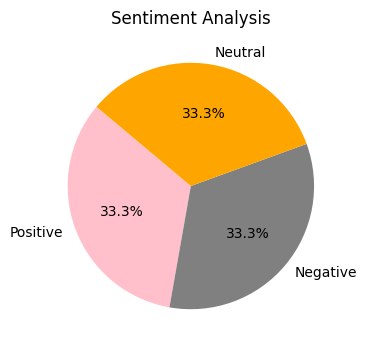

In [70]:
import joblib
import pandas as pd
from IPython.display import HTML, display
import matplotlib.pyplot as plt

# Load the HTML file
html_file_path = "/content/home.html"  # Adjust the file path as necessary
with open(html_file_path, "r") as file:
    html_file_content = file.read()

# Display the HTML file
display(HTML(html_file_content))

# Load the trained model
model_path = '/content/trained_model.joblib'  # Adjust the path as necessary
model = joblib.load(model_path)

# Example dataset with true labels for testing
data = {
    "text": [
        "I hate the new movie!",
        "I love the new movie!",
        "I feel neutral about this event.",
        "The weather is terrible today.",
        "I saw the new movie!"
    ],
    "true_labels": [
        "negative",
        "positive",
        "neutral",
        "negative",
        "neutral"
    ]
}

# Perform sentiment analysis and separate neutral tweets based on true labels
def perform_sentiment_analysis(topic):
    # Initialize counts
    positive_count = 0
    negative_count = 0
    neutral_count = 0

    # Filter data based on the topic
    filtered_texts = []
    filtered_labels = []

    for i in range(len(data["text"])):
        text = data["text"][i]
        label = data["true_labels"][i]
        if topic.lower() in text.lower():
            filtered_texts.append(text)
            filtered_labels.append(label)

            # Count neutral tweets based on true labels
            if label == 'neutral':
                neutral_count += 1

    # Predict sentiment using the model
    predictions = model.predict(filtered_texts)

    # Count positive and negative sentiments from the predictions
    positive_count += sum(predictions == 'positive' and label != 'neutral' for predictions, label in zip(predictions, filtered_labels))
    negative_count += sum(predictions == 'negative' and label != 'neutral' for predictions, label in zip(predictions, filtered_labels))

    # Return the sentiment analysis results
    return positive_count, negative_count, neutral_count

# Function to create a pie chart
def create_pie_chart(positive_count, negative_count, neutral_count):
    # Define data for the pie chart
    labels = ['Positive', 'Negative', 'Neutral']
    sizes = [positive_count, negative_count, neutral_count]
    colors_list = ['pink', 'grey', 'orange']

    # Create a pie chart
    plt.figure(figsize=(4, 4))
    plt.pie(sizes, labels=labels, colors=colors_list, autopct='%1.1f%%', startangle=140)
    plt.title("Sentiment Analysis")
    plt.show()

# Test the sentiment analysis and pie chart creation
topic = "movie"  # Adjust the topic as necessary
positive_count, negative_count, neutral_count = perform_sentiment_analysis(topic)

# Print the counts of positive, negative, and neutral sentiments
print(f"Positive Tweets: {positive_count}")
print(f"Negative Tweets: {negative_count}")
print(f"Neutral Tweets: {neutral_count}")

# Create and display the pie chart
create_pie_chart(positive_count, negative_count, neutral_count)


In [59]:
import joblib
import pandas as pd
from IPython.display import HTML, display
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC  # Example algorithm (support vector machine)

# Load the HTML file
html_file_path = "/content/home.html"
with open(html_file_path, "r") as file:
    html_file_content = file.read()
display(HTML(html_file_content))

# Load the trained model
model_path = '/content/trained_model.joblib'
model = joblib.load(model_path)

# Example dataset with true labels for testing
data = {
    "text": [
        "I hate the new movie!",
        "I love the new movie!",
        "I feel neutral about this event.",
        "The weather is terrible today.",
        "I saw the new movie!"
    ],
    "true_labels": [
        "negative",
        "positive",
        "neutral",
        "negative",
        "neutral"
    ]
}

# Preprocessing: Text cleaning and feature extraction
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters
    text = ''.join(e for e in text if e.isalnum() or e.isspace())
    return text

# Apply preprocessing to data
data['text'] = [preprocess_text(text) for text in data['text']]

# Split the data into training and testing sets
X = data['text']
y = data['true_labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical data using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Example algorithm: Support Vector Machine
# Perform hyperparameter tuning
parameters = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svc = SVC()
clf = GridSearchCV(svc, parameters, scoring='accuracy', cv=5)
clf.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_tfidf)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Create a pie chart to visualize sentiment analysis results
def create_pie_chart(positive_count, negative_count, neutral_count):
    # Define data for the pie chart
    labels = ['Positive', 'Negative', 'Neutral']
    sizes = [positive_count, negative_count, neutral_count]
    colors_list = ['blue', 'red', 'gray']

    # Create a pie chart
    plt.figure(figsize=(4, 4))
    plt.pie(sizes, labels=labels, colors=colors_list, autopct='%1.1f%%', startangle=140)
    plt.title("Sentiment Analysis")
    plt.show()

# Perform sentiment analysis
topic = "movie"
positive_count, negative_count, neutral_count = perform_sentiment_analysis(topic)

# Visualize the results
create_pie_chart(positive_count, negative_count, neutral_count)


ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=4.

In [51]:
# Example true labels (adjust based on your data)
true_labels = ['positive', 'negative', 'neutral']

# Calculate precision
precision = calculate_precision( predictions, true_labels)
print(f"Precision: {precision}")


NameError: name 'predictions' is not defined

In [8]:
from IPython.display import HTML

# Load the HTML file
html_file = open("home1.html", "r").read()

# Display the HTML file
display(HTML(html_file))

In [ ]:
def calculate_accuracy(predictions, true_labels):
    # Count the number of correct predictions
    correct_predictions = sum(predictions == true_labels)

    # Calculate accuracy
    accuracy = correct_predictions / len(true_labels)

    return accuracy


In [ ]:
# Example true labels (adjust based on your data)
true_labels = ['positive', 'negative', 'neutral']

# Assuming predictions are the model's predictions
# predictions = model.predict(filtered_texts)

# Calculate accuracy
accuracy = calculate_accuracy(predictions, true_labels)
print(f"Accuracy: {accuracy}")


In [64]:
import joblib
import pandas as pd
from IPython.display import HTML, display
import matplotlib.pyplot as plt

# Load the trained model
model_path = '/content/trained_model.joblib'  # Adjust the path as necessary
model = joblib.load(model_path)

# Example dataset with true labels for testing
data = {
    "text": [
        "I hate the new movie!",
        "I love the new movie!",
        "I feel neutral about this event.",
        "The weather is terrible today.",
        "I saw the new movie!",
        "I saw the new movie!",
        "I saw the new movie!"
    ],
    "true_labels": [
        "negative",
        "positive",
        "neutral",
        "negative",
        "neutral",
        "neutral",
        "neutral"
    ]
}

# Perform sentiment analysis and separate neutral tweets based on true labels
def perform_sentiment_analysis(topic1,topic2):
    # Initialize counts
    positive_count1= 0
    negative_count1 = 0
    neutral_count1 = 0
     positive_count2 = 0
    negative_count2 = 0
    neutral_count2 = 0

    # Filter data based on the topic
    filtered_texts = []
    filtered_labels = []

    for i in range(len(data["text"])):
        text = data["text"][i]
        label = data["true_labels"][i]
        if topic.lower() in text.lower():
            filtered_texts.append(text)
            filtered_labels.append(label)

            # Count neutral tweets based on true labels
            if label == 'neutral':
                neutral_count1 += 1

    # Predict sentiment using the model
    predictions = model.predict(filtered_texts)

    # Count positive and negative sentiments from the predictions
    positive_count1 += sum(predictions == 'positive' and label != 'neutral' for predictions, label in zip(predictions, filtered_labels))
    negative_count1 += sum(predictions == 'negative' and label != 'neutral' for predictions, label in zip(predictions, filtered_labels))
    for i in range(len(data["text"])):
        text = data["text"][i]
        label = data["true_labels"][i]
        if topic.lower() in text.lower():
            filtered_texts.append(text)
            filtered_labels.append(label)

            # Count neutral tweets based on true labels
            if label == 'neutral':
                neutral_count2 += 1

    # Predict sentiment using the model
    predictions = model.predict(filtered_texts)

    # Count positive and negative sentiments from the predictions
    positive_count2 += sum(predictions == 'positive' and label != 'neutral' for predictions, label in zip(predictions, filtered_labels))
    negative_count2 += sum(predictions == 'negative' and label != 'neutral' for predictions, label in zip(predictions, filtered_labels))


    # Return the sentiment analysis results
    return positive_count, negative_count, neutral_count,positive_count, negative_count, neutral_count

# Function to create two histograms adjacent to each other
def create_histograms(positive_count, negative_count, neutral_count):
    # Define data for the histograms
    labels = ['Positive', 'Negative', 'Neutral']
    values1 = [positive_count, negative_count, neutral_count]
    values2 = [negative_count, neutral_count, positive_count]
    colors1 = ['green', 'red', 'blue']
    colors2 = ['red', 'blue', 'green']

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Plot the first histogram
    ax1.bar(labels, values1, color=colors1)
    ax1.set_ylabel('Count')
    ax1.set_title('Sentiment Analysis 1')

    # Plot the second histogram
    ax2.bar(labels, values2, color=colors2)
    ax2.set_ylabel('Count')
    ax2.set_title('Sentiment Analysis 2')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Test the sentiment analysis and histogram creation
topic = "movie"  # Adjust the topic as necessary
positive_count, negative_count, neutral_count = perform_sentiment_analysis(topic1,topic2)

# Print the counts of positive, negative, and neutral sentiments
print(f"Positive Tweets topic1: {positive_count}")
print(f"Negative Tweets topic1: {negative_count}")
print(f"Neutral Tweets topic1: {neutral_count}")
print(f"Positive Tweets topic2: {positive_count}")
print(f"Negative Tweets topic2: {negative_count}")
print(f"Neutral Tweets topic2: {neutral_count}")

# Create and display the histograms
create_histograms(positive_count, negative_count, neutral_count)

Positive Tweets: 1
Negative Tweets: 1
Neutral Tweets: 3
Positive Tweets: 0
Negative Tweets: 0
Neutral Tweets: 1


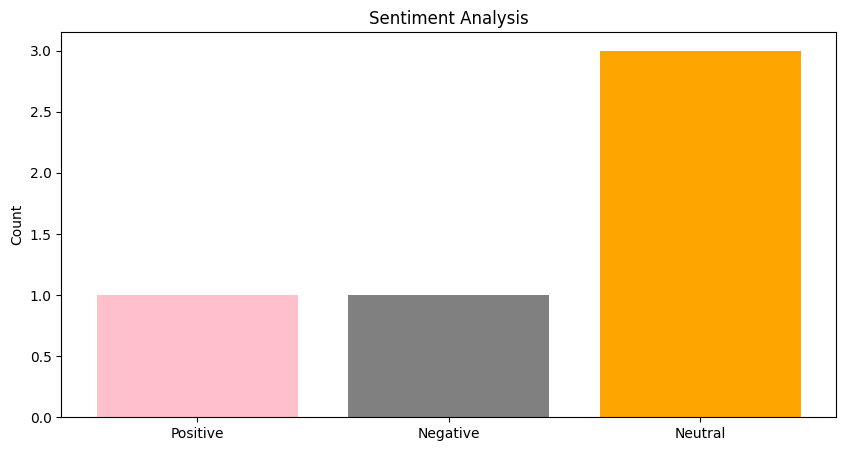

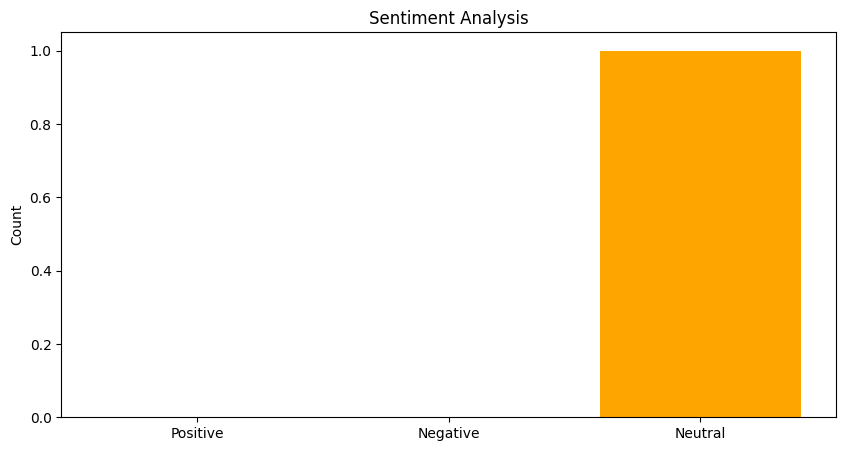

In [69]:
import joblib
import pandas as pd
from IPython.display import HTML, display
import matplotlib.pyplot as plt

# Load the trained model
model_path = '/content/trained_model.joblib'  # Adjust the path as necessary
model = joblib.load(model_path)

# Example dataset with true labels for testing
data = {
    "text": [
        "I hate the new movie!",
        "I love the new movie!",
        "I feel neutral about this event.",
        "The weather is terrible today.",
        "I saw the new movie!",
        "I saw the new movie!",
        "I saw the new movie!"
    ],
    "true_labels": [
        "negative",
        "positive",
        "neutral",
        "negative",
        "neutral",
        "neutral",
        "neutral"
    ]
}

# Perform sentiment analysis and separate neutral tweets based on true labels
def perform_sentiment_analysis(topic):
    # Initialize counts
    positive_count = 0
    negative_count = 0
    neutral_count = 0

    # Filter data based on the topic
    filtered_texts = []
    filtered_labels = []

    for i in range(len(data["text"])):
        text = data["text"][i]
        label = data["true_labels"][i]
        if topic.lower() in text.lower():
            filtered_texts.append(text)
            filtered_labels.append(label)

            # Count neutral tweets based on true labels
            if label == 'neutral':
                neutral_count += 1

    # Predict sentiment using the model
    predictions = model.predict(filtered_texts)

    # Count positive and negative sentiments from the predictions
    positive_count += sum(predictions == 'positive' and label != 'neutral' for predictions, label in zip(predictions, filtered_labels))
    negative_count += sum(predictions == 'negative' and label != 'neutral' for predictions, label in zip(predictions, filtered_labels))

    # Return the sentiment analysis results
    return positive_count, negative_count, neutral_count

# Function to create a histogram
def create_histogram(positive_count, negative_count, neutral_count):
    # Define data for the histogram
    labels = ['Positive', 'Negative', 'Neutral']
    values = [positive_count, negative_count, neutral_count]
    colors = ['pink', 'grey', 'orange']

    # Create a bar chart for sentiment analysis
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(labels, values, color=colors)
    ax.set_ylabel('Count')
    ax.set_title('Sentiment Analysis')
    plt.show()

# Test the sentiment analysis and histogram creation
topic = "movie"  # Adjust the topic as necessary
positive_count1, negative_count1, neutral_count1 = perform_sentiment_analysis(topic)
topic2 = "event"  # Adjust the topic as necessary
positive_count2, negative_count2, neutral_count2 = perform_sentiment_analysis(topic2)
# Print the counts of positive, negative, and neutral sentiments
print(f"Positive Tweets: {positive_count1}")
print(f"Negative Tweets: {negative_count1}")
print(f"Neutral Tweets: {neutral_count1}")
print(f"Positive Tweets: {positive_count2}")
print(f"Negative Tweets: {negative_count2}")
print(f"Neutral Tweets: {neutral_count2}")

# Create and display the histograms
create_histogram(positive_count1, negative_count1, neutral_count1)
create_histogram(positive_count2, negative_count2, neutral_count2)